<a href="https://colab.research.google.com/github/miguelif/Aula_Deep_Learning_Ocean/blob/main/Ocean_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras 
from keras.datasets import mnist #Vase de dadis MNIST
from tensorflow.python.keras import Sequential#Modelo da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout#Neuronios (base de rede) e regularização
from tensorflow.compat.v1.keras.optimizers import RMSprop #Otimizador (back propagation)

In [2]:
#Carregando os dado de treino e teste

In [3]:
(x_treino, y_treino),(x_teste, y_teste) = mnist.load_data()

In [4]:
print("Quantidade de imagens para treino:",len(x_treino))

print("Quantidade de imagens para teste:",len(x_teste))


print("Tipo de x_treino:",type(x_treino))
print("Tipo de x_teste:",type(x_teste))

primeira_image = x_treino[0]
representacao_primeira_imagem = y_treino[0]

print("O que imagem 0 representa:", representacao_primeira_imagem)
print("Formato da primeira imagem:", primeira_image.shape, type(primeira_image.shape))

print(primeira_image)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
Tipo de x_teste: <class 'numpy.ndarray'>
O que imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 17

Essa imagem representa: 5


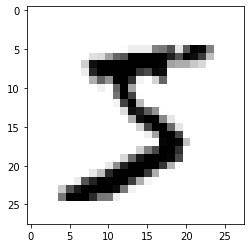

Essa imagem representa: 0


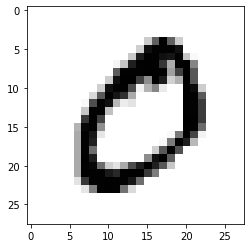

Essa imagem representa: 4


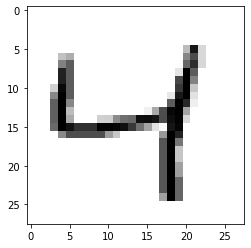

Essa imagem representa: 1


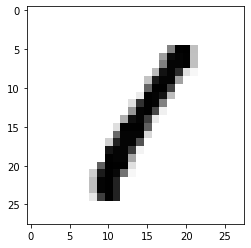

Essa imagem representa: 9


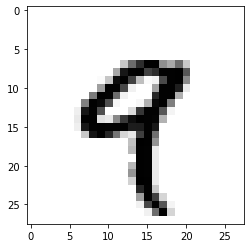

Essa imagem representa: 2


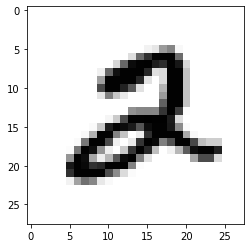

In [5]:
import matplotlib.pyplot as plt

for indice in range(6):
  print("Essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice],cmap=plt.cm.binary)
  plt.show()

In [6]:
# Organizar camada de entrata ( input)
# Organizar camada de saida ( output)
# Estruturar a nossa rede neural
# Treinar o modelo
#Fazer as previsões

In [7]:
quantidade_treino = len(x_treino) #60000 itens
quantidade_teste = len(x_teste) #10000 itens

resolucao_imagem = x_treino[0].shape # (28x28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] #28*28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)#muda o formato do array
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [8]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

#Como ficou x_treino[0]

print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [9]:
#Normalização dos dados

#255 vira 1
# 127 vira 0.5
# 0 vira 0

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))

0.27450982 <class 'numpy.float32'>


In [10]:
#visualizando os dados normalizados

print("Dados normalizados:", x_treino[0])

Dados normalizados: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [16]:
# Preparacao de camada de saide ( output)

valores_unicos = set(y_treino)# {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos)#10
print(quantidade_valores_unicos)

print("y_treino[0] antes:",y_treino[0])

y_treino = keras.utils.to_categorical(y_treino,quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste,quantidade_valores_unicos)
print("y_treino[0] depois:",y_treino[0])


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
#criano o modelo de rede neural

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

#Adicionamos um regularizador, que ajuda a evitar o overfitting

model.add(Dropout(0.2))

#Segunda hidden layer
# 20 neurônios
# Função de ativação: ReLU

model.add(Dense(20, activation='relu'))

#Mais um regularizador, que ajuda a evitar o overfitting

model.add(Dropout(0.2))

#Finalizamos com a camada de saida (output), informado a quantidade de valores unicos, que no caso e 10
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

#exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [20]:
#compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [21]:
#treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8575 - accuracy: 0.7275 - val_loss: 0.3172 - val_accuracy: 0.9085
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.8591 - val_loss: 0.2408 - val_accuracy: 0.9287
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8812 - val_loss: 0.2213 - val_accuracy: 0.9358
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8924 - val_loss: 0.2052 - val_accuracy: 0.9400
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.9015 - val_loss: 0.1954 - val_accuracy: 0.9436
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.9057 - val_loss: 0.1858 - val_accuracy: 0.9455
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3025 - accuracy: 0.9111 - val_loss: 0.1790 - val_accuracy: 0.9490
Epoch 

Valor categorico em y_teste[indice: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Previsão: [[1.1910657e-08 1.4062594e-07 8.8344468e-06 7.2289043e-04 2.5409332e-03
  1.0192920e-05 1.2364452e-11 4.8787589e-03 6.1163177e-05 9.9177718e-01]]
Previsão ajustada: [9]


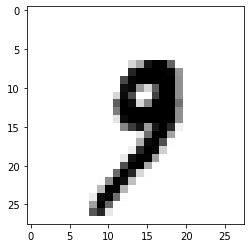

In [28]:
#fazendo nossa previsões

indice = 1000
# qual e o valor categorico e y_teste[indice]?
print("Valor categorico em y_teste[indice:", y_teste[indice])

#preparar a image para fazer a previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

prediction = model.predict(imagem)
print("Previsão:", prediction)

#transforma a previsao em algo que conseguimos enteder

import numpy as np
prediction_class = np.argmax(model.predict(imagem), axis=1)
print("Previsão ajustada:", prediction_class)

# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
